### Author = 'Timothy McDonough'
### Email = 'timothylmcdonough@gmail.com'

#  Time Series Forecasting of Google Stock Price

In [463]:
import os
import datetime

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Part 1: Obtaining the Data

In [464]:
#set working directory to correct file location and import data
os.chdir('/Users/timothylmcdonough/DSDJ/Sales/Data')

google_df = pd.read_csv('Google.csv', parse_dates=['Date'])
google = google_df.loc[google_df['Name'] == 'GOOGL']

## Part 2: Scrubbing the Data

Lets take a look at the first 5 rows of the dataframe

In [465]:
google_df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


A check to see if there are any missing values in our data set:

In [466]:
raw_sales_df.isnull().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA Sales        False
EU Sales        False
JP Sales        False
Other Sales     False
Global Sales    False
dtype: bool

There are no missing values.

## Part 3: Data Exploration
  ### 3a. Statistical Overview

A look at the size of the data set and the types of data in the data set:

In [467]:
google_df.shape

(3019, 7)

The set has 7 attributes and 3,019 features.

A look at the types of columns:

In [468]:
google_df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
dtype: object

Lets look at the range of data:

In [469]:
google['Date'].min(), google['Date'].max()

(Timestamp('2006-01-03 00:00:00'), Timestamp('2017-12-29 00:00:00'))

The span of the data set is 12 years.

Lets focus on the "Close" price for the time being.  We will drop the other columns and perform one more confirmation that there are no missing values on our remaining data:

In [470]:
cols = ['Open', 'High', 'Low', 'Volume', 'Name']
google.drop(cols, axis=1, inplace=True)
google = google.sort_values('Date')

In [471]:
google.isnull().sum()

Date     0
Close    0
dtype: int64

Creating an index using the "Date" column and confirming the index creation took place correctly:

In [473]:
google = google.set_index('Date')
google.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

In [474]:
google_y = google['Close'].resample('MS').mean()

In [475]:
google_y['2017':]

Date
2017-01-01     830.249500
2017-02-01     836.754737
2017-03-01     853.789565
2017-04-01     861.377895
2017-05-01     961.654545
2017-06-01     973.372727
2017-07-01     963.443500
2017-08-01     937.960870
2017-09-01     945.884500
2017-10-01     999.145000
2017-11-01    1046.983333
2017-12-01    1053.917500
Freq: MS, Name: Close, dtype: float64

One more check to make sure the data frame appears how we want it to look for analysis:

In [476]:
google_y.head()

Date
2006-01-01    223.078500
2006-02-01    185.184211
2006-03-01    179.613043
2006-04-01    207.095789
2006-05-01    192.090909
Freq: MS, Name: Close, dtype: float64

Lets plot the closing values across the date range to start:

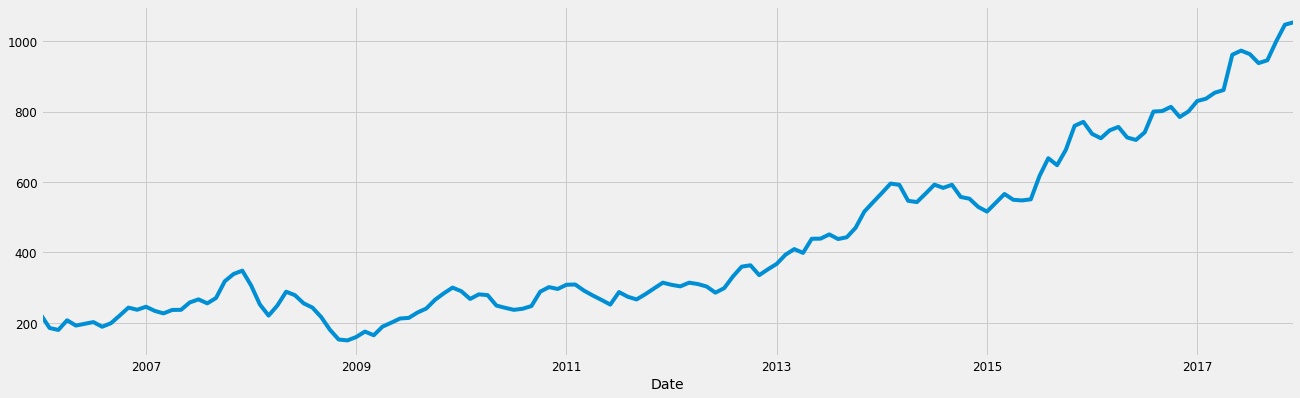

In [477]:
google_y.plot(figsize=(20, 6))
plt.show()

No seasonality patterns seems to appear at this time though a distingishable upward trend appears between 
2008 and 2010 continuing upward all the way to the end of the data set.  Now lets vizualize the data via 
time-series decomposition which allows us to break the data down to view trend, seasonality, and noise
associated with the data set.

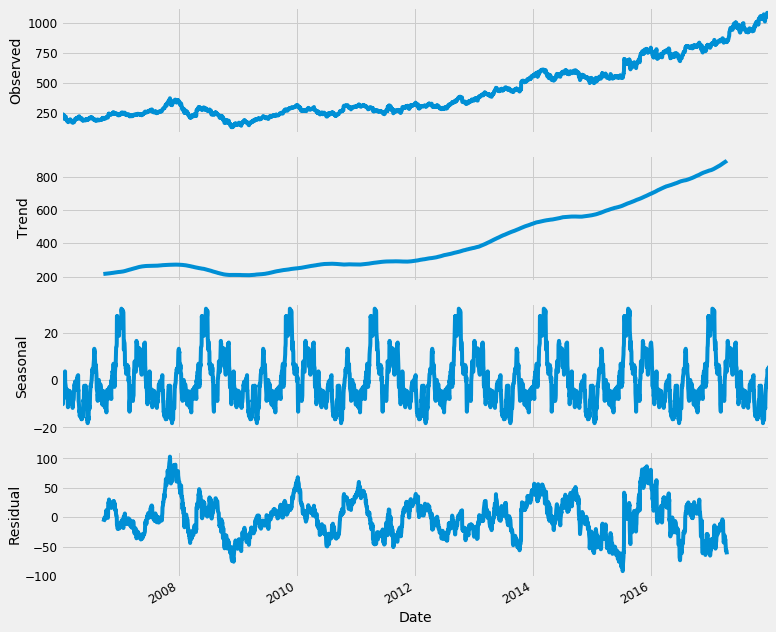

In [478]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(google["Close"], freq=360)
fig = decomposition.plot()
plt.show()

In the plots above we continue to see the upward trend in the data but now we can begin to see a unform seasonal change appear.  The residuals seem to randomly oscilate around 0 which is good.  These plots show that this stock is a good long term investment.

Now lets apply an ARIMA model to the data.  The p, d, and q parameters represent the trend, seasonality, and noise in the data.  Below are some examples of the values these parameters can take:

In [479]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


We can now use a grid search to find the optimal parameter values to use for our data set:

In [480]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(google_y,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
            
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2179.306225987997
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1889.0163320583451
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1607.9146781420905
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1465.4182626785087
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1536.9875076435155
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1498.3697018567946
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1472.9382798483239
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1427.6790292756841
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1979.340211709699
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1708.7094574198206
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1449.1752524569488
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1321.4004813530541
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1408.9941473612712
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1361.1304074109069
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1342.3335285302524
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1301.3634564457323
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1314.840361075984
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1212.649412322

The output above shows that the SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model yields the lowest AIC value of AIC: 1098.27.  We will consider this to be the best option.  

## Fitting the ARIMA Model To Our Data

Now lets fit the model to our data:

In [481]:
mod = sm.tsa.statespace.SARIMAX(google_y,
                                order=(0, 0, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0443      0.028     36.909      0.000       0.989       1.100
sigma2      3571.7736    442.341      8.075      0.000    2704.800    4438.747


Now lets run model diagnostics to confirm there is no unusual behavior taking place:

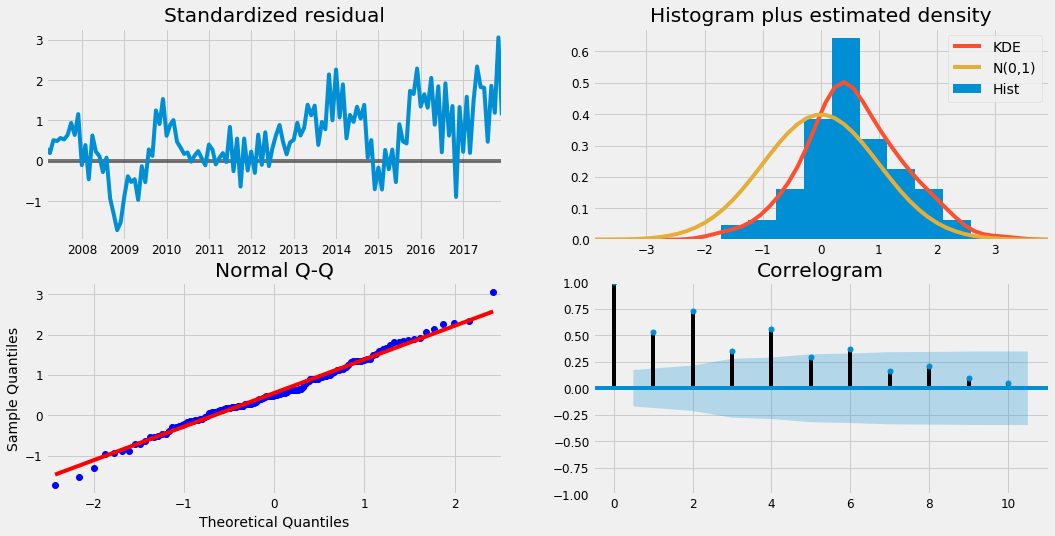

In [482]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

The diagnostic visuals above show that the data is fairly normally distributed.

## Validating Forecasts

Now lets compare the predicted prices to the actual prices to understand how accurate our model is:

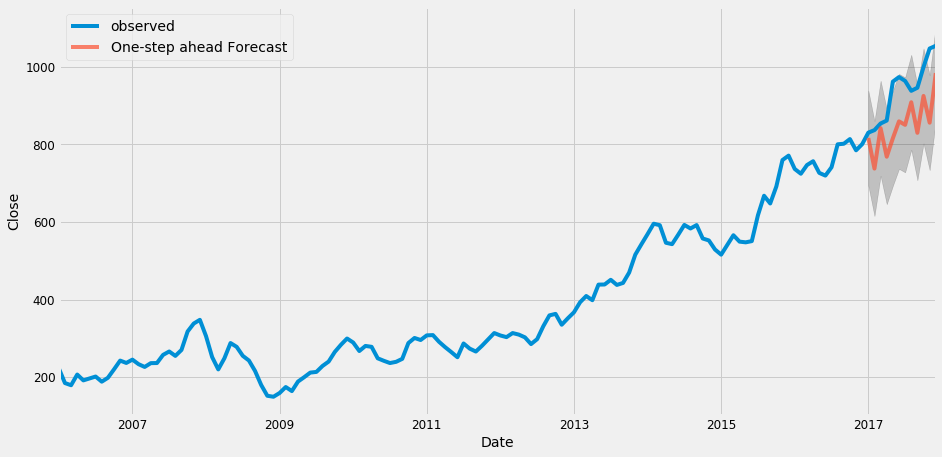

In [483]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = google_y['2006':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

This graph comapares the observed values versus the predicted values for 2017.  Overall the forecast fits against the observed data very well by capturing the upward trend we saw earlier in our observations in the data along with the seasonality we also saw in the data.  Its also important to note the forecasted values and actual values almost entirely fit within the range of the grey confidence internal.  One other observation which is good to note is that the forecast is conservative and does not forecast higher than the actual stock price which could result in some upset stockholders.

In [484]:
#***need to recreate furniture notebook then at this point print out y_forecasted and 'y_truth' 
#and compare their formats to your google_forecasted and google_truth 

google_forecasted = pred.predicted_mean
google_truth = google_y['2017-01-01':]
mse = ((google_forecasted - google_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10605.41


In [485]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 102.98


The MSE measures the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator.  The MSE is always non-negative.  The smaller the MSE, the closer we are to finding the line of best fit.  

The root mean squared error (RMSE) tells us our forecast was able to predict the closing price of the stock within roughly 100 points of its actual closing price.  The range of the close price goes from under 200 to over 1200.  Considering this range, an RMSE of 102 with a range of data over 1000 is a good estimator.

## Producing Long Range Forecasts

Lets see how our forecast looks years out from now:

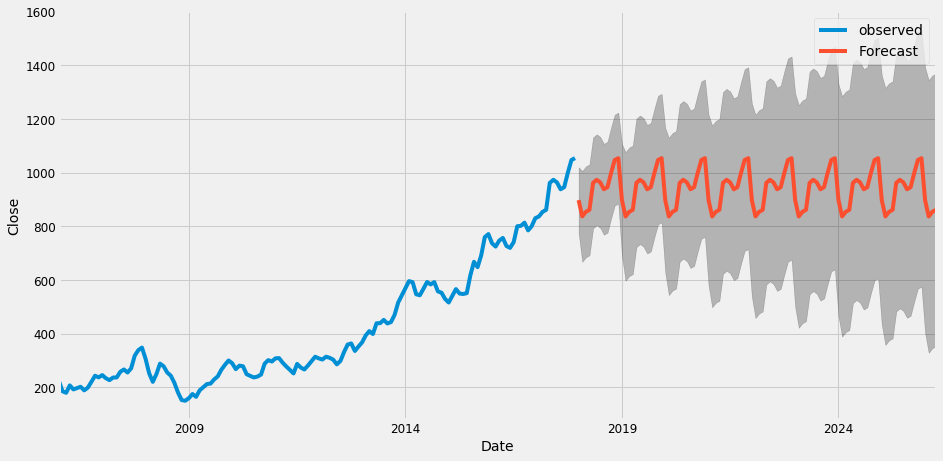

In [486]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = google_y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

Obviously the further out the forecast is, the more difficult it will be to predict with higher accuracy.  This is why we see a widening of the grey confidence interval above. 

Closing Thoughts:
-The forecast for the closing field turned out well.  Would this type of forecast work as well for "Open", "High", and "Low" fields where different behavioral patterns may be displayed?